In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
# upload csv in here

data = pd.read_csv('HanceRapoluFullMatch.csv')
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
data.head(100)

,pointScore,gameScore,setScore,isPointStart,pointStartTime,isPointEnd,pointEndTime,shotInRally,side,serverName,firstServeIn,firstServeZone,firstServeXCoord,firstServeYCoord,secondServeIn,secondServeZone,secondServeXCoord,secondServeYCoord,returnContactX,returnContactY,returnPlacementX,returnPlacementY,shotContactX,shotContactY,shotType,isVolley,isApproach,isDropshot,shotLocationX,shotLocationY,isWinner,isErrorWideR,isErrorWideL,isErrorNet,isErrorLong,pointNumber,clientTeam,Date,Division,Event,lineupPosition,player1Name,player2Name,Round,Surface,Notes,shotDirection,shotFhBh,tiebreakScore,returnData,returnerName,shotHitBy
0,0-0,0-0,0-0,1.0,9486.0,NaN,NaN,1,Deuce,Malaika Rapolu,0.0,T,NaN,NaN,1.0,Body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,UCLA,1/20/24,D1,NaN,2.0,Kimmi Hance,Malaika Rapolu,NaN,Hard,Did till 51:22 / 2:09:22,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu
1,0-0,0-0,0-0,NaN,NaN,NaN,NaN,2,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,30-30 point in 3-5 game missing,Crosscourt,Forehand,NaN,Forehand Crosscourt,Kimmi Hance,Kimmi Hance
2,0-0,0-0,0-0,NaN,NaN,NaN,NaN,3,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu
3,0-0,0-0,0-0,NaN,NaN,NaN,NaN,4,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance
4,0-0,0-0,0-0,NaN,NaN,NaN,NaN,5,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu
5,0-0,0-0,0-0,NaN,NaN,NaN,NaN,6,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance
6,0-0,0-0,0-0,NaN,NaN,NaN,NaN,7,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Backhand,NaN,NaN,Kimmi Hance,Malaika Rapolu
7,0-0,0-0,0-0,NaN,NaN,1.0,48070.0,8,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Down the Line,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,NaN,Kimmi Hance,Kimmi Hance
8,0-15,0-0,0-0,1.0,75253.0,NaN,NaN,1,Ad,Malaika Rapolu,1.0,Wide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu
9,0-15,0-0,0-0,NaN,NaN,1.0,80405.0,2,NaN,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,Backhand Down the Line,Kimmi Hance,Kimmi Hance


In [3]:
data['side'].fillna(method = 'ffill', inplace = True)
for i in range(0, len(data)):
    if data['firstServeIn'].iloc[i] == 1:
        data['secondServeIn'].iloc[i] = 0
data['firstServeIn'].fillna(method = 'ffill', inplace = True)
data['secondServeIn'].fillna(method = 'ffill', inplace = True)

/Users/danielneufeldt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
winner = [np.nan for _ in range(len(data))]
player_1 = data['player1Name'][0]
player_2 = data['player2Name'][0]
for i in range(0, len(data)):
    if data['isPointEnd'][i] == 1:
        if data['shotHitBy'][i] == player_1:
            if data['isWinner'][i] == 1:
                winner[i] = player_1
            else:
                winner[i] = player_2
        else:
            if data['isWinner'][i] == 1:
                winner[i] = player_2
            else:
                winner[i] = player_1
data['winner'] = winner

In [9]:
shotType = np.nan
for i in range(len(data)):
    if data['shotInRally'][i] == 2:
        if data['shotFhBh'][i] == 'Forehand':
            shotType = 'Forehand'
        else:
            shotType = 'Backhand'
    if data['isPointEnd'][i] == 1:
        data['returnData'][i] = shotType
        shotType = np.nan
data.head(100)

/var/folders/q2/d3fzkpt9329d688rdfsqblfc0000gn/T/ipykernel_33450/1098495781.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['returnData'][i] = shotType


,pointScore,gameScore,setScore,isPointStart,pointStartTime,isPointEnd,pointEndTime,shotInRally,side,serverName,firstServeIn,firstServeZone,firstServeXCoord,firstServeYCoord,secondServeIn,secondServeZone,secondServeXCoord,secondServeYCoord,returnContactX,returnContactY,returnPlacementX,returnPlacementY,shotContactX,shotContactY,shotType,isVolley,isApproach,isDropshot,shotLocationX,shotLocationY,isWinner,isErrorWideR,isErrorWideL,isErrorNet,isErrorLong,pointNumber,clientTeam,Date,Division,Event,lineupPosition,player1Name,player2Name,Round,Surface,Notes,shotDirection,shotFhBh,tiebreakScore,returnData,returnerName,shotHitBy,winner
0,0-0,0-0,0-0,1.0,9486.0,NaN,NaN,1,Deuce,Malaika Rapolu,0.0,T,NaN,NaN,1.0,Body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,UCLA,1/20/24,D1,NaN,2.0,Kimmi Hance,Malaika Rapolu,NaN,Hard,Did till 51:22 / 2:09:22,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN
1,0-0,0-0,0-0,NaN,NaN,NaN,NaN,2,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,30-30 point in 3-5 game missing,Crosscourt,Forehand,NaN,Forehand Crosscourt,Kimmi Hance,Kimmi Hance,NaN
2,0-0,0-0,0-0,NaN,NaN,NaN,NaN,3,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN
3,0-0,0-0,0-0,NaN,NaN,NaN,NaN,4,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance,NaN
4,0-0,0-0,0-0,NaN,NaN,NaN,NaN,5,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN
5,0-0,0-0,0-0,NaN,NaN,NaN,NaN,6,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance,NaN
6,0-0,0-0,0-0,NaN,NaN,NaN,NaN,7,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Backhand,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN
7,0-0,0-0,0-0,NaN,NaN,1.0,48070.0,8,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Down the Line,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,Forehand,Kimmi Hance,Kimmi Hance,Kimmi Hance
8,0-15,0-0,0-0,1.0,75253.0,NaN,NaN,1,Ad,Malaika Rapolu,1.0,Wide,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN
9,0-15,0-0,0-0,NaN,NaN,1.0,80405.0,2,Ad,Malaika Rapolu,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,Backhand,Kimmi Hance,Kimmi Hance,Malaika Rapolu


In [41]:
isError = [np.nan for _ in range(len(data))]

for i in range(len(data)):
    if data['shotInRally'].iloc[i] == 2:
        if data['isErrorWideR'].iloc[i] == 1:
            isError[i] = 'Wide R'
        if data['isErrorWideL'].iloc[i] == 1:
            isError[i] = 'Wide L'
        if data['isErrorNet'].iloc[i] == 1:
            isError[i] = "Net"
        if data['isErrorLong'].iloc[i] == 1:
            isError[i] = "Long"

data['isError'] = isError
data.head(20)


,pointScore,gameScore,setScore,isPointStart,pointStartTime,isPointEnd,pointEndTime,shotInRally,side,serverName,firstServeIn,firstServeZone,firstServeXCoord,firstServeYCoord,secondServeIn,secondServeZone,secondServeXCoord,secondServeYCoord,returnContactX,returnContactY,returnPlacementX,returnPlacementY,shotContactX,shotContactY,shotType,isVolley,isApproach,isDropshot,shotLocationX,shotLocationY,isWinner,isErrorWideR,isErrorWideL,isErrorNet,isErrorLong,pointNumber,clientTeam,Date,Division,Event,lineupPosition,player1Name,player2Name,Round,Surface,Notes,shotDirection,shotFhBh,tiebreakScore,returnData,returnerName,shotHitBy,winner,isError
0,0-0,0-0,0-0,1.0,9486.0,NaN,NaN,1,Deuce,Malaika Rapolu,0.0,T,NaN,NaN,1.0,Body,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,UCLA,1/20/24,D1,NaN,2.0,Kimmi Hance,Malaika Rapolu,NaN,Hard,Did till 51:22 / 2:09:22,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN
1,0-0,0-0,0-0,NaN,NaN,NaN,NaN,2,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,30-30 point in 3-5 game missing,Crosscourt,Forehand,NaN,Forehand Crosscourt,Kimmi Hance,Kimmi Hance,NaN,NaN
2,0-0,0-0,0-0,NaN,NaN,NaN,NaN,3,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN
3,0-0,0-0,0-0,NaN,NaN,NaN,NaN,4,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance,NaN,NaN
4,0-0,0-0,0-0,NaN,NaN,NaN,NaN,5,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Forehand,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN
5,0-0,0-0,0-0,NaN,NaN,NaN,NaN,6,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forehand Down the Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Forehand,NaN,NaN,Kimmi Hance,Kimmi Hance,NaN,NaN
6,0-0,0-0,0-0,NaN,NaN,NaN,NaN,7,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Crosscourt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Crosscourt,Backhand,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN
7,0-0,0-0,0-0,NaN,NaN,1.0,48070.0,8,Deuce,Malaika Rapolu,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Backhand Down the Line,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,Forehand,Kimmi Hance,Kimmi Hance,Kimmi Hance,NaN
8,0-15,0-0,0-0,1.0,75253.0,NaN,NaN,1,Ad,Malaika Rapolu,1.0,Wide,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN
9,0-15,0-0,0-0,NaN,NaN,1.0,80405.0,2,Ad,Malaika Rapolu,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN,NaN,Kimmi Hance,Malaika Rapolu,NaN,NaN,NaN,Down the Line,Backhand,NaN,Backhand,Kimmi Hance,Kimmi Hance,Malaika Rapolu,Net


In [42]:
data_filtered = data[['pointScore', 'isPointEnd', 'side', 'serverName', 'firstServeIn', 'secondServeIn',
                     'returnData', 'returnerName', 'winner', 'isError']]
data_filtered = data_filtered[(data_filtered['isPointEnd'] == 1) & 
                              (data_filtered['returnData'].isin(['Forehand', 'Backhand']))]
data_filtered.head(20)

,pointScore,isPointEnd,side,serverName,firstServeIn,secondServeIn,returnData,returnerName,winner,isError
7,0-0,1.0,Deuce,Malaika Rapolu,0.0,1.0,Forehand,Kimmi Hance,Kimmi Hance,NaN
9,0-15,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Malaika Rapolu,Net
12,15-15,1.0,Deuce,Malaika Rapolu,0.0,1.0,Backhand,Kimmi Hance,Kimmi Hance,NaN
23,15-30,1.0,Ad,Malaika Rapolu,0.0,1.0,Backhand,Kimmi Hance,Kimmi Hance,NaN
37,15-40,1.0,Deuce,Malaika Rapolu,0.0,1.0,Backhand,Kimmi Hance,Malaika Rapolu,NaN
41,30-40,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Malaika Rapolu,NaN
48,40-40,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Kimmi Hance,NaN
51,0-0,1.0,Deuce,Kimmi Hance,1.0,0.0,Forehand,Malaika Rapolu,Malaika Rapolu,NaN
62,0-15,1.0,Ad,Kimmi Hance,1.0,0.0,Forehand,Malaika Rapolu,Malaika Rapolu,NaN
65,0-30,1.0,Deuce,Kimmi Hance,1.0,0.0,Forehand,Malaika Rapolu,Malaika Rapolu,NaN


I split the data by serve, but Shiyu said it's better to split by side and then make another table that splits by stroke. So ignore a lot of what happens below bc I don't wanna delete this code

In [43]:
player_1_first = data_filtered[(data_filtered['firstServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_1)]
player_1_second = data_filtered[(data_filtered['secondServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_1)]
player_2_first = data_filtered[(data_filtered['firstServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_2)]
player_2_second = data_filtered[(data_filtered['secondServeIn'] == 1) &
                              (data_filtered['returnerName'] == player_2)]

In [44]:
player_1_first_errors = player_1_first[player_1_first['isError'].notna()]
player_1_second_errors = player_1_second[player_1_second['isError'].notna()]
player_2_first_errors = player_2_first[player_2_first['isError'].notna()]
player_2_second_errors = player_2_second[player_2_second['isError'].notna()]

In [45]:
# get small dataframes for each error type
player_1_first_errors_wideR = player_1_first_errors[player_1_first_errors['isError'] == 'Wide R']
player_1_first_errors_wideL = player_1_first_errors[player_1_first_errors['isError'] == 'Wide L']
player_1_first_errors_long = player_1_first_errors[player_1_first_errors['isError'] == 'Long']
player_1_first_errors_net = player_1_first_errors[player_1_first_errors['isError'] == 'Net']

player_1_second_errors_wideR = player_1_second_errors[player_1_second_errors['isError'] == 'Wide R']
player_1_second_errors_wideL = player_1_second_errors[player_1_second_errors['isError'] == 'Wide L']
player_1_second_errors_long = player_1_second_errors[player_1_second_errors['isError'] == 'Long']
player_1_second_errors_net = player_1_second_errors[player_1_second_errors['isError'] == 'Net']

player_2_first_errors_wideR = player_2_first_errors[player_2_first_errors['isError'] == 'Wide R']
player_2_first_errors_wideL = player_2_first_errors[player_2_first_errors['isError'] == 'Wide L']
player_2_first_errors_long = player_2_first_errors[player_2_first_errors['isError'] == 'Long']
player_2_first_errors_net = player_2_first_errors[player_2_first_errors['isError'] == 'Net']

player_2_second_errors_wideR = player_2_first_errors[player_2_first_errors['isError'] == 'Wide R']
player_2_second_errors_wideL = player_2_first_errors[player_2_first_errors['isError'] == 'Wide L']
player_2_second_errors_long = player_2_first_errors[player_2_first_errors['isError'] == 'Long']
player_2_second_errors_net = player_2_first_errors[player_2_first_errors['isError'] == 'Net']

Honestly, Looking at the data, there aren't many observations for each mini-dataframe, so let's ignore the types of errors and just focus on errors.

In [51]:
player_1_first_errors_percent = round(len(player_1_first_errors) / len(player_1_first) * 100, 2)
player_1_second_errors_percent = round(len(player_1_second_errors) / len(player_1_second) * 100, 2)
player_2_first_errors_percent = round(len(player_2_first_errors) / len(player_2_first) * 100, 2)
player_2_second_errors_percent = round(len(player_2_second_errors) / len(player_2_second) * 100, 2)

print(player_1, 'first serve return error percent: ', player_1_first_errors_percent, '%',
     '(', len(player_1_first_errors), '/', len(player_1_first), ')')
print(player_1, 'second serve return error percent: ', player_1_second_errors_percent, '%',
     '(', len(player_1_second_errors), '/', len(player_1_second), ')')
print(player_2, 'first serve return error percent: ', player_2_first_errors_percent, '%',
     '(', len(player_2_first_errors), '/', len(player_2_first), ')')
print(player_2, 'second serve return error percent: ', player_2_second_errors_percent, '%',
     '(', len(player_2_second_errors), '/', len(player_2_second), ')')

Kimmi Hance first serve return error percent:  13.79 % ( 8 / 58 )
Kimmi Hance second serve return error percent:  11.76 % ( 4 / 34 )
Malaika Rapolu first serve return error percent:  2.86 % ( 1 / 35 )
Malaika Rapolu second serve return error percent:  0.0 % ( 0 / 8 )


In [53]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [54]:
from tabulate import tabulate

In [64]:
string_11 = str(len(player_1_first_errors)) + '/' + str(len(player_1_first))
string_12 = str(len(player_1_second_errors)) + '/' + str(len(player_1_second))
string_21 = str(len(player_2_first_errors)) + '/' + str(len(player_2_first))
string_22 = str(len(player_2_second_errors)) + '/' + str(len(player_2_second))


header = ['Player Name', '1st Serve Return Error Rate', '2nd Serve Return Error Rate']
table = [[player_1, string_11, string_12],
        [player_2, string_21, string_22]]

In [67]:
print(tabulate(table, headers = header, tablefmt = 'grid', showindex = False))

+----------------+-------------------------------+-------------------------------+
| Player Name    | 1st Serve Return Error Rate   | 2nd Serve Return Error Rate   |
+================+===============================+===============================+
| Kimmi Hance    | 8/58                          | 4/34                          |
+----------------+-------------------------------+-------------------------------+
| Malaika Rapolu | 1/35                          | 0/8                           |
+----------------+-------------------------------+-------------------------------+


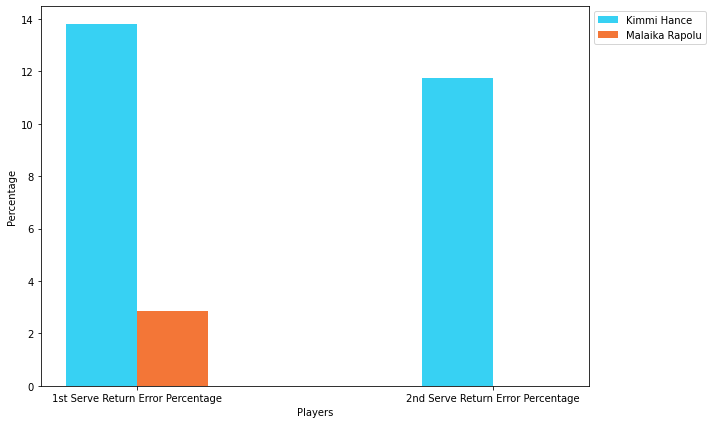

In [84]:
x = np.arange(2)
y1 = [player_1_first_errors_percent, player_1_second_errors_percent]
y2 = [player_2_first_errors_percent, player_2_second_errors_percent]

width = 0.2

x_ticks = x - 0.1

plt.figure(figsize = (10, 6))

plt.bar(x - 0.2, y1, width, color = '#37D1F3')
plt.bar(x, y2, width, color = '#F37637')
plt.xticks(x_ticks, ['1st Serve Return Error Percentage', '2nd Serve Return Error Percentage'])
plt.xlabel("Players")
plt.ylabel("Percentage")
plt.legend([player_1, player_2], loc = 'upper left', bbox_to_anchor = (1, 1))


plt.tight_layout()
plt.show()

(Start paying attention here) Let's also split the errors by first and second and then ad and deuce side

In [97]:
player_1_first_ad

,pointScore,isPointEnd,side,serverName,firstServeIn,secondServeIn,returnData,returnerName,winner,isError
9,0-15,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Malaika Rapolu,Net
41,30-40,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Malaika Rapolu,NaN
48,40-40,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Kimmi Hance,NaN
209,40-30,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Kimmi Hance,NaN
236,40-40,1.0,Ad,Malaika Rapolu,1.0,0.0,Forehand,Kimmi Hance,Malaika Rapolu,NaN
274,15-0,1.0,Ad,Malaika Rapolu,1.0,0.0,Backhand,Kimmi Hance,Kimmi Hance,NaN
327,15-0,1.0,Ad,Malaika Rapolu,1.0,0.0,Forehand,Kimmi Hance,Malaika Rapolu,NaN
338,30-15,1.0,Ad,Malaika Rapolu,1.0,0.0,Forehand,Kimmi Hance,Malaika Rapolu,Net
359,40-40 (Ad),1.0,Ad,Malaika Rapolu,1.0,0.0,Forehand,Kimmi Hance,Malaika Rapolu,NaN
433,40-30,1.0,Ad,Rapulo,1.0,0.0,Forehand,Kimmi Hance,Kimmi Hance,NaN


Make two graphs. One splitted by player and then by side and the other split by player and then stroke

In [103]:
player_1_data = data_filtered[data_filtered['returnerName'] == player_1]
player_2_data = data_filtered[data_filtered['returnerName'] == player_2]

player_1_errors = player_1_data[player_1_data['isError'].notna()]
player_2_errors = player_2_data[player_2_data['isError'].notna()]

Let's make the split by side now

In [112]:
player_1_ad = player_1_errors[player_1_errors['side'] == 'Ad']
player_1_deuce = player_1_errors[player_1_errors['side'] == 'Deuce']

player_2_ad = player_2_errors[player_2_errors['side'] == 'Ad']
player_2_deuce = player_2_errors[player_2_errors['side'] == 'Deuce']

player_1_ad_total = player_1_data[player_1_data['side'] == 'Ad']
player_1_deuce_total = player_1_data[player_1_data['side'] == 'Deuce']
player_2_ad_total = player_2_data[player_2_data['side'] == 'Ad']
player_2_deuce_total = player_2_data[player_2_data['side'] == 'Deuce']

In [119]:
player_1_errors_percent_ad = round(len(player_1_ad) / len(player_1_ad_total) * 100, 2)
player_1_errors_percent_deuce = round(len(player_1_deuce) / len(player_1_deuce_total) * 100, 2)
player_2_errors_percent_ad = round(len(player_2_ad) / len(player_2_ad_total) * 100, 2)
player_2_errors_percent_deuce = round(len(player_2_deuce) / len(player_2_deuce_total) * 100, 2)

print(player_1, 'Ad side return error percent: ', player_1_errors_percent_ad, '%',
     '(', len(player_1_ad), '/', len(player_1_ad_total), ')')
print(player_1, 'Deuce side return error percent: ', player_1_errors_percent_deuce, '%',
     '(', len(player_1_deuce), '/', len(player_1_deuce_total), ')')
print(player_2, 'Ad side return error percent: ', player_2_errors_percent_ad, '%',
     '(', len(player_2_ad), '/', len(player_2_ad_total), ')')
print(player_2, 'Deuce side return error percent: ', player_2_errors_percent_deuce, '%',
     '(', len(player_2_deuce), '/', len(player_2_deuce_total), ')')

Kimmi Hance Ad side return error percent:  11.54 % ( 6 / 52 )
Kimmi Hance Deuce side return error percent:  15.0 % ( 6 / 40 )
Malaika Rapolu Ad side return error percent:  0.0 % ( 0 / 26 )
Malaika Rapolu Deuce side return error percent:  5.88 % ( 1 / 17 )


In [140]:
string_11 = str(player_1_errors_percent_ad) + '% ' + '(' + str(len(player_1_ad)) + '/' + str(len(player_1_ad_total)) + ')'
string_12 = str(player_1_errors_percent_deuce) + '% ' + '(' + str(len(player_1_deuce)) + '/' + str(len(player_1_deuce_total)) + ')'
string_21 = str(player_2_errors_percent_ad) + '% ' + '(' + str(len(player_2_ad)) + '/' + str(len(player_2_ad_total)) + ')'
string_22 = str(player_2_errors_percent_deuce) + '% ' + '(' + str(len(player_2_deuce)) + '/' + str(len(player_2_deuce_total)) + ')'


header = ['Player Name', 'Ad side Return Error Rate', 'Deuce side Return Error Rate']
table = [[player_1, string_11, string_12],
        [player_2, string_21, string_22]]

In [141]:
print(tabulate(table, headers = header, tablefmt = 'grid', showindex = False))

+----------------+-----------------------------+--------------------------------+
| Player Name    | Ad side Return Error Rate   | Deuce side Return Error Rate   |
+================+=============================+================================+
| Kimmi Hance    | 11.54% (6/52)               | 15.0% (6/40)                   |
+----------------+-----------------------------+--------------------------------+
| Malaika Rapolu | 0.0% (0/26)                 | 5.88% (1/17)                   |
+----------------+-----------------------------+--------------------------------+


Now, let's make the table for strokes

In [142]:
player_1_forehand = player_1_errors[player_1_errors['returnData'] == 'Forehand']
player_1_backhand = player_1_errors[player_1_errors['returnData'] == 'Backhand']

player_2_forehand = player_2_errors[player_2_errors['returnData'] == 'Forehand']
player_2_backhand = player_2_errors[player_2_errors['returnData'] == 'Backhand']

player_1_forehand_total = player_1_data[player_1_data['returnData'] == 'Forehand']
player_1_backhand_total = player_1_data[player_1_data['returnData'] == 'Backhand']
player_2_forehand_total = player_2_data[player_2_data['returnData'] == 'Forehand']
player_2_backhand_total = player_2_data[player_2_data['returnData'] == 'Backhand']

In [143]:
player_1_errors_percent_forehand = round(len(player_1_forehand) / len(player_1_forehand_total) * 100, 2)
player_1_errors_percent_backhand = round(len(player_1_backhand) / len(player_1_backhand_total) * 100, 2)
player_2_errors_percent_forehand = round(len(player_2_forehand) / len(player_2_forehand_total) * 100, 2)
player_2_errors_percent_backhand = round(len(player_2_backhand) / len(player_2_backhand_total) * 100, 2)

print(player_1, 'Ad side return error percent: ', player_1_errors_percent_forehand, '%',
     '(', len(player_1_forehand), '/', len(player_1_forehand_total), ')')
print(player_1, 'Deuce side return error percent: ', player_1_errors_percent_backhand, '%',
     '(', len(player_1_backhand), '/', len(player_1_backhand_total), ')')
print(player_2, 'Ad side return error percent: ', player_2_errors_percent_forehand, '%',
     '(', len(player_2_forehand), '/', len(player_2_forehand_total), ')')
print(player_2, 'Deuce side return error percent: ', player_2_errors_percent_backhand, '%',
     '(', len(player_2_backhand), '/', len(player_2_backhand_total), ')')

Kimmi Hance Ad side return error percent:  15.56 % ( 7 / 45 )
Kimmi Hance Deuce side return error percent:  10.64 % ( 5 / 47 )
Malaika Rapolu Ad side return error percent:  5.56 % ( 1 / 18 )
Malaika Rapolu Deuce side return error percent:  0.0 % ( 0 / 25 )


In [144]:
string_11 = str(player_1_errors_percent_forehand) + '% ' + '(' + str(len(player_1_forehand)) + '/' + str(len(player_1_forehand_total)) + ')'
string_12 = str(player_1_errors_percent_backhand) + '% ' + '(' + str(len(player_1_backhand)) + '/' + str(len(player_1_backhand_total)) + ')'
string_21 = str(player_2_errors_percent_forehand) + '% ' + '(' + str(len(player_2_forehand)) + '/' + str(len(player_2_forehand_total)) + ')'
string_22 = str(player_2_errors_percent_backhand) + '% ' + '(' + str(len(player_2_backhand)) + '/' + str(len(player_2_backhand_total)) + ')'


header = ['Player Name', 'Ad side Return Error Rate', 'Deuce side Return Error Rate']
table = [[player_1, string_11, string_12],
        [player_2, string_21, string_22]]

In [145]:
print(tabulate(table, headers = header, tablefmt = 'grid', showindex = False))

+----------------+-----------------------------+--------------------------------+
| Player Name    | Ad side Return Error Rate   | Deuce side Return Error Rate   |
+================+=============================+================================+
| Kimmi Hance    | 15.56% (7/45)               | 10.64% (5/47)                  |
+----------------+-----------------------------+--------------------------------+
| Malaika Rapolu | 5.56% (1/18)                | 0.0% (0/25)                    |
+----------------+-----------------------------+--------------------------------+
